In [1]:
# de python, para especificar rutas de archivos y directorios
from pathlib import Path

# lib para trabajar con arrays
import numpy as np

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para construir y entrenar redes neuronales, y que además tiene utilidades para leer sets de 
# imágenes
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import load_img, img_to_array

# libs que usamos para tareas generales de machine learning. En este caso, métricas
from sklearn.metrics import accuracy_score, confusion_matrix

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

In [10]:
# lo vamos a estar usando seguido
ANIMALES = "gato", "perro"
# configurar de acuerdo a dónde bajaron los sets de imágenes
TRAIN_DIR = Path('./training_set')
VALIDATION_DIR = Path('./test_set')

In [28]:
train = image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",  # adivinar los labels en base al nombre del sub directorio ("ariel", etc)
    label_mode="categorical",  # tenemos N labels, queremos tuplas de 0s y 1s indicando cuál de los labels es
    class_names=ANIMALES,  # para usar el mismo orden en todos lados
    color_mode="rgb",  # queremos trabajar con las imágenes a color
    image_size=(64, 64),  # para que corra más rápido, vamos a achicar las imágenes
    shuffle=True,  # que recorra el set de imágenes en orden aleatorio
    seed=42,  # semilla para que la aleatoriedad sea repetible
)

validation = image_dataset_from_directory(
    VALIDATION_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=ANIMALES,
    color_mode="rgb",
    image_size=(64, 64),
    shuffle=True,
    seed=42,
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [29]:
def sample_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(ANIMALES[np.argmax(labels[i])])
            plt.axis("off")

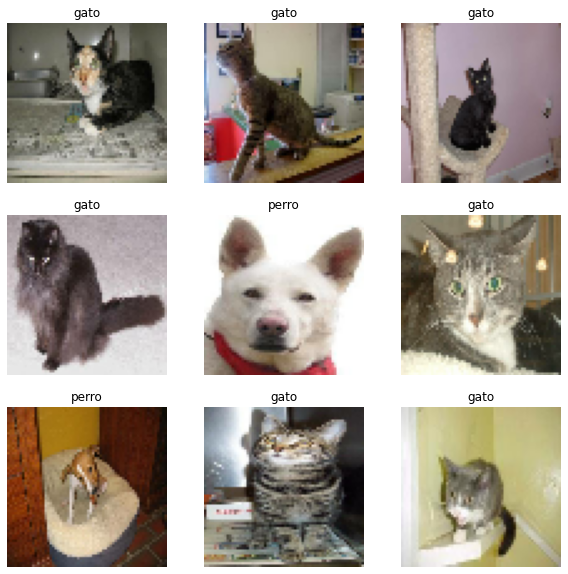

In [30]:
sample_images(train)

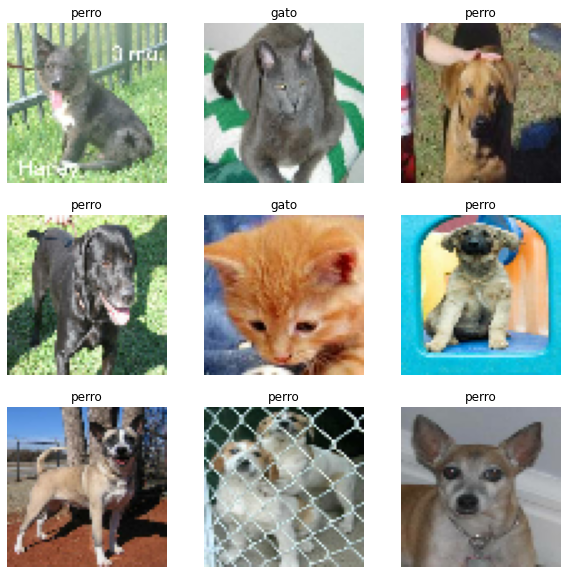

In [31]:
sample_images(validation)

## Red neuronal

### Red MLP

### Redes Convolucionales

In [32]:
model_GOOD = Sequential([
    # el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
    # usamos una capa de Rescaling para normalizar las entradas de los datasets
    Rescaling(1/255, input_shape=(64, 64, 3)),

    Convolution2D(filters=8, kernel_size=(4, 4), strides=1, activation='relu'),
    # kernels de 4x4x3, y salida de 61x61x8
    Dropout(0.2),
    
    Convolution2D(filters=8, kernel_size=(4, 4), strides=1, activation='relu'),
    # kernels de 4x4x8, y salida de 58x58x8
    Dropout(0.2),
    
    MaxPooling2D(pool_size=(4, 4)),
    # salida de 14x14x8
    
    Flatten(),
    # salida de 1568
    
    Dense(10, activation='tanh'),
    # salida de 10
    Dropout(0.2),
    
    Dense(10, activation='tanh'),
    # salida de 10
    Dropout(0.2),

    Dense(len(ANIMALES), activation='softmax'),
    # salida de 3
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',],
)

In [118]:
model_SAD = Sequential([
    # el shape de los inputs es alto_imagen * ancho_imagen * cantidad_colores
    # usamos una capa de Rescaling para normalizar las entradas de los datasets
    Rescaling(1/255, input_shape=(64, 64, 3)),

    Convolution2D(filters=16, kernel_size=(4, 4), strides=1, activation='relu'),
    # kernels de 4x4x3, y salida de 61x61x8
    Dropout(0.2),
    
    Convolution2D(filters=16, kernel_size=(4, 4), strides=1, activation='relu'),
    # kernels de 4x4x8, y salida de 58x58x8
    Dropout(0.2),
    
    Convolution2D(filters=16, kernel_size=(4, 4), strides=1, activation='relu'),
    # kernels de 4x4x8, y salida de 58x58x8
    Dropout(0.2),
    
    MaxPooling2D(pool_size=(4, 4)),
    # salida de 14x14x8
    
    Flatten(),
    # salida de 1568
    
    Dense(10, activation='tanh'),
    # salida de 10
    Dropout(0.2),
    
    Dense(10, activation='tanh'),
    # salida de 10
    Dropout(0.2),

    Dense(len(ANIMALES), activation='sigmoid'),
    # salida de 3
])

model_SAD.compile(
    optimizer='adam',
    loss='mean_squared_error', #categorical_crossentropy
    metrics=['accuracy',],
)

In [119]:
#model.summary()

In [120]:
history = model_SAD.fit(
    train,
    epochs=10,
    batch_size=500,
    validation_data=validation,
)

Epoch 1/10
251/251 [==============================] - 35s 137ms/step - loss: 0.2599 - accuracy: 0.5137 - val_loss: 0.2483 - val_accuracy: 0.5274
Epoch 2/10
251/251 [==============================] - 34s 135ms/step - loss: 0.2399 - accuracy: 0.6023 - val_loss: 0.2312 - val_accuracy: 0.6144
Epoch 3/10
251/251 [==============================] - 34s 135ms/step - loss: 0.2209 - accuracy: 0.6478 - val_loss: 0.2018 - val_accuracy: 0.6876
Epoch 4/10
251/251 [==============================] - 34s 134ms/step - loss: 0.2010 - accuracy: 0.6964 - val_loss: 0.2061 - val_accuracy: 0.6723
Epoch 5/10
251/251 [==============================] - 34s 135ms/step - loss: 0.1891 - accuracy: 0.7243 - val_loss: 0.1922 - val_accuracy: 0.7069
Epoch 6/10
251/251 [==============================] - 34s 135ms/step - loss: 0.1814 - accuracy: 0.7353 - val_loss: 0.1928 - val_accuracy: 0.7088
Epoch 7/10
251/251 [==============================] - 34s 134ms/step - loss: 0.1712 - accuracy: 0.7491 - val_loss: 0.1908 - val_ac

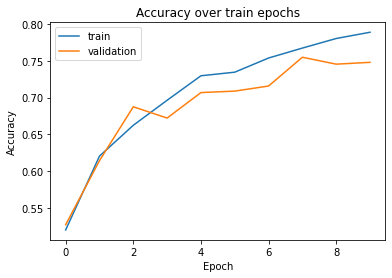

In [121]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

######################### train #########################
accuracy 0.7773891317926296


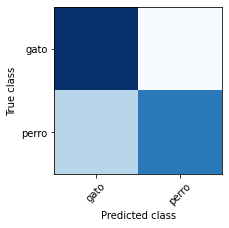

######################### validation #########################
accuracy 0.7261492832427089


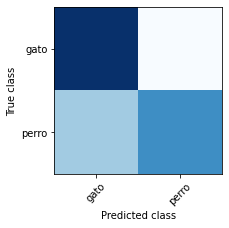

In [122]:
datasets = (
    ("train", train),
    ("validation", validation),   
)

for dataset_name, dataset in datasets:
    print('#' * 25, dataset_name, '#' * 25)

    # el dataset se itera en batches, así que calculams predicciones y labels por cada batch, y luego 
    # concatenamos todo
    batches_predictions = []
    batches_labels =  []
    
    for batch_images, batch_labels in dataset:
        # super importante: usamos argmax para convertir cosas de este formato:
        # [(0, 1, 0), (1, 0, 0), (1, 0, 0), (0, 0, 1)]
        # a este formato (donde tenemos el índice de la clase que tiene número más alto):
        # [1, 0, 0, 2]
        batches_predictions.append(np.argmax(model.predict(batch_images), axis=-1))
        batches_labels.append(np.argmax(batch_labels, axis=-1))

    predictions = np.concatenate(batches_predictions)
    labels = np.concatenate(batches_labels)
    
    print('accuracy', accuracy_score(labels, predictions))

    # graficamos la confussion matrix
    plt.figure(figsize=(3, 4))
        
    plt.xticks([0, 1], ANIMALES, rotation=45)
    plt.yticks([0, 1], ANIMALES)
    plt.xlabel('Predicted class')
    plt.ylabel('True class')

    plt.imshow(
        confusion_matrix(labels, predictions), 
        cmap=plt.cm.Blues,
        interpolation='nearest',
    )

    plt.show()

In [44]:
from IPython.display import Image, display


def show_and_predict(image_path):
    image_array = img_to_array(load_img(image_path, target_size=(64, 64)))
    inputs = np.array([image_array])  # armamos un "dataset" con solo esa imagen
    predictions = model.predict(inputs)
    display(Image(image_path, width=500))
    print("Prediction:", ANIMALES[np.argmax(predictions)])
    print("Prediction detail:", predictions)

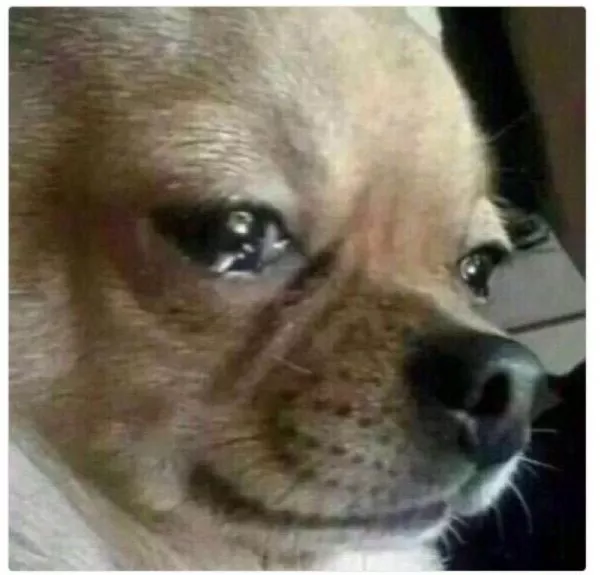

Prediction: gato
Prediction detail: [[0.8734039  0.12659603]]


In [55]:
show_and_predict("./prueba/perrito_llorando.png")